# S1 vs s2 Conditional GAN - 14/11/19

As mentioned before, s1 and s2 are important characteristics to correctly model. Therefore the following script will create a conditional GAN, using s1 for dark matter at 50KeV to 200KeV. It takes in and trains on all 5. THis is the most data we have given to a GAN, and it does seem to learn the distributions, however not as well as we would like. 

<font color='orange'>16/11/19 - It has been brought to our attention that the S1 and S2 variables have not been accurately reproduced in this dataset. However the layering may still work??  </font>

<font color='orange'>10/12/19 - This is actually a really good example of how GANs COULD WORK. Shame the same neural net setup doesnt work on the actual S1 and S2 data.</font>

In [0]:
pip install uproot

     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/dark_matter_7_12_19

/content/gdrive/My Drive/dark_matter_7_12_19


Here we will extract some root files, most will be used to train the GAN, then one will be used to 'validate' the GAN.

Currently, we will use 50, 150, and 250 to train and 100 and 200 to validate.

In [0]:
import uproot
import pandas
import numpy as np
import matplotlib.pyplot as plt

tree50 = uproot.open("dark_matter_runs_50kev.root")["dstree"]
tree75 = uproot.open("dark_matter_runs_75kev.root")["dstree"]
tree100 = uproot.open("dark_matter_100kev_v1.root")["dstree"]
tree125 = uproot.open("dark_matter_runs_125kev.root")["dstree"]
tree150 = uproot.open("dark_matter_runs_150kev.root")["dstree"]
tree200 = uproot.open("dark_matter_runs_200kev.root")["dstree"]

In [0]:
tree50.show()

ev                         (no streamer)              asdtype('>i4')
pdg                        (no streamer)              asdtype('>i4')
ene0                       (no streamer)              asdtype('>f4')
s1ene                      (no streamer)              asdtype('>f4')
s2ene                      (no streamer)              asdtype('>f4')
veto_visene                (no streamer)              asdtype('>f4')
mu_visene                  (no streamer)              asdtype('>f4')
vetoene                    (no streamer)              asdtype('>f4')
muene                      (no streamer)              asdtype('>f4')
tpcene                     (no streamer)              asdtype('>f4')
x                          (no streamer)              asdtype('>f4')
y                          (no streamer)              asdtype('>f4')
z                          (no streamer)              asdtype('>f4')
ene                        (no streamer)              asdtype('>f4')
r                          (no str

The Variable is input here to try to make the code reusable and as general as possible.

In [0]:
#VARIABLE
var1 = "s1_corr"
var2 = "s2"

In [0]:
div1 = 1
div1 = 200
div2 = 1
div2 = 2200
rangemins1 = 0
rangemaxs1 = 2500
rangemins2 = 2000
rangemaxs2 = 30000
train_DS_s1ene_50 = np.array(tree50.array(f"{var1}"))/div1
train_DS_s1ene_75 = np.array(tree75.array(f"{var1}"))/div1
train_DS_s1ene_100 = np.array(tree100.array(f"{var1}"))/div1
train_DS_s1ene_125 = np.array(tree125.array(f"{var1}"))/div1
train_DS_s1ene_150 = np.array(tree150.array(f"{var1}"))/div1
train_DS_s1ene_200 = np.array(tree200.array(f"{var1}"))/div1

train_DS_s2ene_50 = np.array(tree50.array(f"{var2}"))/div2
train_DS_s2ene_75 = np.array(tree75.array(f"{var2}"))/div2
train_DS_s2ene_100 = np.array(tree100.array(f"{var2}"))/div2
train_DS_s2ene_125 = np.array(tree125.array(f"{var2}"))/div2
train_DS_s2ene_150 = np.array(tree150.array(f"{var2}"))/div2
train_DS_s2ene_200 = np.array(tree200.array(f"{var2}"))/div2

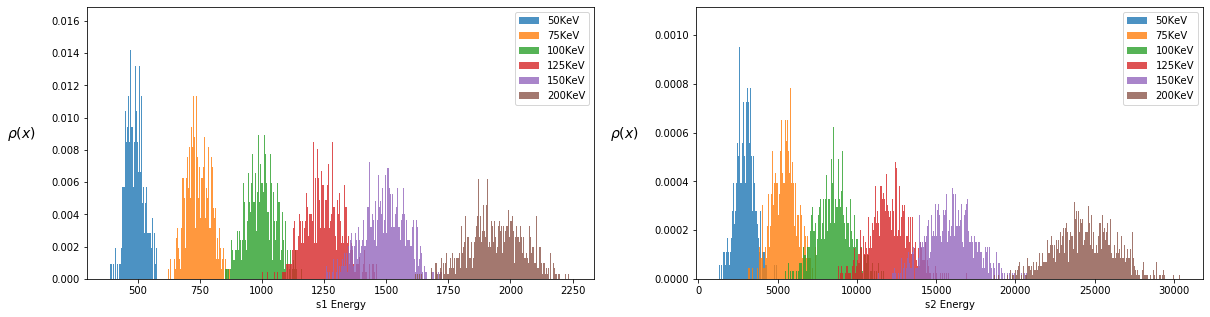

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
ax1.hist(train_DS_s1ene_50*div1, density = True, bins = 205, alpha = 0.8, label = "50KeV")
ax1.hist(train_DS_s1ene_75*div1, density = True, bins = 205, alpha = 0.8, label = "75KeV")
ax1.hist(train_DS_s1ene_100*div1, density = True, bins = 205, alpha = 0.8, label = "100KeV")
ax1.hist(train_DS_s1ene_125*div1, density = True, bins = 205, alpha = 0.8, label = "125KeV")
ax1.hist(train_DS_s1ene_150*div1, density = True, bins = 205, alpha = 0.8, label = "150KeV")
ax1.hist(train_DS_s1ene_200*div1, density = True, bins = 205, alpha = 0.8, label = "200KeV")

ax1.set_xlabel("s1 Energy")
ax1.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
ax1.legend(loc="upper right", fontsize=10)
#ax2.hist(train_DS_s2ene_150, density = True, bins = 10)
ax2.hist(train_DS_s2ene_50*div2,density = True, bins = 205, alpha = 0.8, label = "50KeV")
ax2.hist(train_DS_s2ene_75*div2, density = True, bins = 205, alpha = 0.8, label = "75KeV")
ax2.hist(train_DS_s2ene_100*div2, density = True, bins = 205, alpha = 0.8, label = "100KeV")
ax2.hist(train_DS_s2ene_125*div2, density = True, bins = 205, alpha = 0.8, label = "125KeV")
ax2.hist(train_DS_s2ene_150*div2, density = True, bins = 205, alpha = 0.8, label = "150KeV")
ax2.hist(train_DS_s2ene_200*div2, density = True, bins = 205, alpha = 0.8, label = "200KeV")

#ax2.set_ylim(top = 5)
ax2.set_xlabel("s2 Energy")
ax2.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
ax2.legend(loc="upper right", fontsize=10)
#print(np.mean(train_DS_s2ene_50))
plt.show()

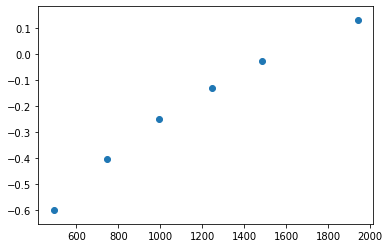

In [0]:
s1 = [np.mean(train_DS_s1ene_50*div1),np.mean(train_DS_s1ene_75*div1),np.mean(train_DS_s1ene_100*div1),np.mean(train_DS_s1ene_125*div1),np.mean(train_DS_s1ene_150*div1),np.mean(train_DS_s1ene_200*div1)]
logs2s1 = [np.log(np.mean(train_DS_s2ene_50*div1)/np.mean(train_DS_s1ene_50*div1)),np.log(np.mean(train_DS_s2ene_75*div1)/np.mean(train_DS_s1ene_75*div1)),np.log(np.mean(train_DS_s2ene_100*div1)/np.mean(train_DS_s1ene_100*div1)),np.log(np.mean(train_DS_s2ene_125*div1)/np.mean(train_DS_s1ene_125*div1)),np.log(np.mean(train_DS_s2ene_150*div1)/np.mean(train_DS_s1ene_150*div1)),np.log(np.mean(train_DS_s2ene_200*div1)/np.mean(train_DS_s1ene_200*div1))]
           
plt.scatter(s1,logs2s1)


In [0]:
num_train = int(1e3)
noise_size = 1000

# Length needs to be followed through
train_var = [50.,75.,100., 125., 150., 200.]
num_in = len(train_var)

In [0]:
from keras.layers     import BatchNormalization, Dense, Dropout, Input, LeakyReLU, Concatenate
from keras.models     import Model, Sequential, load_model
from keras.optimizers import Adam, SGD

import keras.backend as K
d_do = 0.2
g_nodes = 120
d_nodes = 120
g_do = 0.2
#Input of GEN VALUE
d1_in = Input((2,))
d1 = Dense(d_nodes, activation="relu")(d1_in)
d1 = Dropout(d_do)(d1)

#Input of parameter = energy
hyper_in = Input((1,))
d2 = Dense(d_nodes, activation="relu")(hyper_in)
d2 = Dropout(d_do)(d2)

dc = Concatenate()([d1, d2])
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
#dc = LeakyReLU(0.2)(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
#dc = LeakyReLU(0.2)(dc)
dc = Dropout(d_do)(dc)
dc = Dense(2, activation="softmax")(dc)

dc = Model(name="Discriminator", inputs=[d1_in, hyper_in], outputs=[dc])
dc.compile(loss="categorical_crossentropy", optimizer=Adam(0.001, beta_1=0.1), metrics=["accuracy"])
# 0.0005, beta_1=0.5
dc.summary()

#INPUT OF NOISE TO GENERATOR
g1_in = Input((noise_size,))
g1 = Dense(g_nodes, activation="relu")(g1_in)
g1 = Dropout(g_do)(g1)
g1 = BatchNormalization()(g1)
g1 = Dense(g_nodes, activation="relu")(g1)

#INPUT OF HYPERPARAM
g2 = Dense(g_nodes, activation="relu")(hyper_in)

gc = Concatenate()([g1, g2])
gc = BatchNormalization()(gc)
gc = Dropout(g_do)(gc)
gc = Dense(g_nodes, activation="relu")(gc)
gc = Dropout(g_do)(gc)
gc = Dense(g_nodes, activation="relu")(gc)
gc = Dropout(g_do)(gc)
gc = Dense(g_nodes, activation="relu")(gc)
gc = Dropout(g_do)(gc)
g1 = Dense(g_nodes, activation="relu")(g1)
gc = Dense(2, activation="linear")(gc)

gc = Model(name="Generator", inputs=[g1_in, hyper_in], outputs=[gc])
gc.summary()


gan_out = dc([gc([g1_in, hyper_in]), hyper_in])
gan = Model([g1_in, hyper_in], gan_out, name="GAN")
dc.trainable = False
gan.compile(loss="categorical_crossentropy", optimizer=Adam(0.001, beta_1=0.1), metrics=["accuracy"])
gan.summary()

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "Discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 120)          360         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 120)          240        

In [0]:
#  Train GAN
rel_batch_size = 1
max_D_itrs_per_G_itr_e80 = 2
max_D_itrs_per_G_itr_e52 = 3

In [0]:
def plot_points_GAN (gen_data, train_DS_s1ene_50, train_DS_s1ene_100,train_DS_s1ene_150,minloss_given, epoch, batch_size, d_acc) :
    minloss = minloss_given
    s1 = np.asarray(gen_DS)[:,0]
    s2 = np.asarray(gen_DS)[:,1]

    gen_class_length = int(gen_DS.shape[0]/num_in)
    gen_data_50_s1 = s1[:gen_class_length                    ]
    gen_data_75_s1 = s1[gen_class_length  :2*gen_class_length]
    gen_data_100_s1 = s1[2*gen_class_length:3*gen_class_length]
    gen_data_125_s1 = s1[3*gen_class_length:4*gen_class_length]
    gen_data_150_s1 = s1[4*gen_class_length:5*gen_class_length]
    gen_data_200_s1 = s1[5*gen_class_length:6*gen_class_length]


    gen_data_50_s2 = s2[:gen_class_length                    ]
    gen_data_75_s2 = s2[gen_class_length  :2*gen_class_length]
    gen_data_100_s2 = s2[2*gen_class_length:3*gen_class_length]
    gen_data_125_s2 = s2[3*gen_class_length:4*gen_class_length]
    gen_data_150_s2 = s2[4*gen_class_length:5*gen_class_length]
    gen_data_200_s2 = s2[5*gen_class_length:6*gen_class_length]


    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    fig.suptitle(f"s1 and s2 from a 2D cGAN at Epoch {epoch} and batch size {batch_size}")
    #y_max, x, _ = plt.hist(train_DS_s1ene_50,range = (0,70), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='blue')
    trues1_50 = ax1.hist(train_DS_s1ene_50*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='blue')
    trues1_75 = ax1.hist(train_DS_s1ene_75*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='orange')
    trues1_100 = ax1.hist(train_DS_s1ene_100*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "100KeV", color='red')
    trues1_125 = ax1.hist(train_DS_s1ene_125*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "125KeV", color='purple')
    trues1_150 = ax1.hist(train_DS_s1ene_150*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "150KeV",color='green')
    trues1_200 = ax1.hist(train_DS_s1ene_200*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "200KeV",color='indigo')

    gens1_50 = ax1.hist(gen_data_50_s1*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='blue')
    gens1_75 = ax1.hist(gen_data_75_s1*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='orange')
    gens1_100 = ax1.hist(gen_data_100_s1*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='red')
    gens1_125 = ax1.hist(gen_data_125_s1*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='purple')
    gens1_150 = ax1.hist(gen_data_150_s1*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='green')
    gens1_200 = ax1.hist(gen_data_200_s1*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='indigo')


    ax1.set_xlabel("s1 Energy")
    ax1.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
    ax1.legend(loc="upper right", fontsize=10)
    #ax1.text(60,0.75*0.8,f"Epochs: {e}")
    #ax1.text(60,0.65*0.8,f"Batch Size: {batch_size}")

    trues2_50 = ax2.hist(train_DS_s2ene_50*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='blue')
    trues2_75 = ax2.hist(train_DS_s2ene_75*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='orange')
    trues2_100 = ax2.hist(train_DS_s2ene_100*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "100KeV", color='red')
    trues2_125 = ax2.hist(train_DS_s2ene_125*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "125KeV", color='purple')
    trues2_150 = ax2.hist(train_DS_s2ene_150*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "150KeV",color='green')
    trues2_200 = ax2.hist(train_DS_s2ene_200*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "200KeV",color='indigo')

    gens2_50 = ax2.hist(gen_data_50_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='blue')
    gens2_75 = ax2.hist(gen_data_75_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='orange')
    gens2_100 = ax2.hist(gen_data_100_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='red')
    gens2_125 = ax2.hist(gen_data_125_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='purple')
    gens2_150 = ax2.hist(gen_data_150_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='green')
    gens2_200 = ax2.hist(gen_data_200_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='indigo')


    ax2.set_xlabel("s2 Energy")
    ax2.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
    #ax2.title(f"s2 from a 2D cGAN at Epoch {e} and batch size {batch_size}")
    #ax2.text(8.5,0.75*5,f"Epochs: {e}")
    #ax2.text(8.5,0.65*5,f"Batch Size: {batch_size}")

    ax2.legend(loc="upper right", fontsize=10)

    #Check difference
    
    diffs1_200 = trues1_200[0] - gens1_200[0]
    diffs2_200 = trues2_200[0] - gens2_200[0]
    diffs1_150 = trues1_150[0] - gens1_150[0]
    diffs2_150 = trues2_150[0] - gens2_150[0]
    diffs1_125 = trues1_125[0] - gens1_125[0]
    diffs2_125 = trues2_125[0] - gens2_125[0]
    diffs1_100 = trues1_100[0] - gens1_100[0]
    diffs2_100 = trues2_100[0] - gens2_100[0]
    diffs1_75 = trues1_75[0] - gens1_75[0]
    diffs2_75 = trues2_75[0] - gens2_75[0]
    diffs1_50 = trues1_50[0] - gens1_50[0]
    diffs2_50 = trues2_50[0] - gens2_50[0]
    sum_diff = 0
    for i in range(len(diffs1_50)):
      sum_diff += abs(diffs1_50[i]) + abs(diffs2_50[i]) + abs(diffs1_75[i]) + abs(diffs2_75[i]) + abs(diffs1_100[i]) + abs(diffs2_100[i]) + abs(diffs1_125[i]) + abs(diffs2_125[i]) + abs(diffs1_150[i]) + abs(diffs2_150[i])+ abs(diffs1_200[i]) + abs(diffs2_200[i])
    #If statement
    if sum_diff < minloss:
      #save weights
      print("SAVING")
      gc.save("2D_s1_s2_5IN.h5")
      minloss = sum_diff

    plt.show()
    return minloss







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


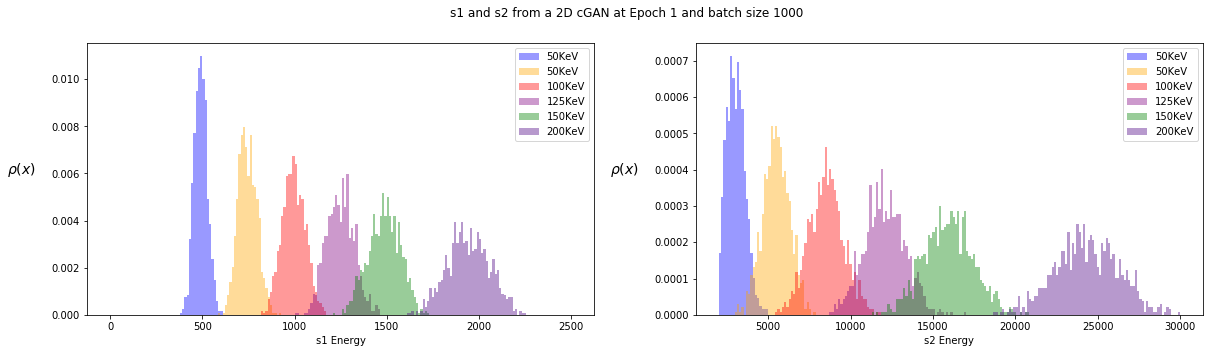

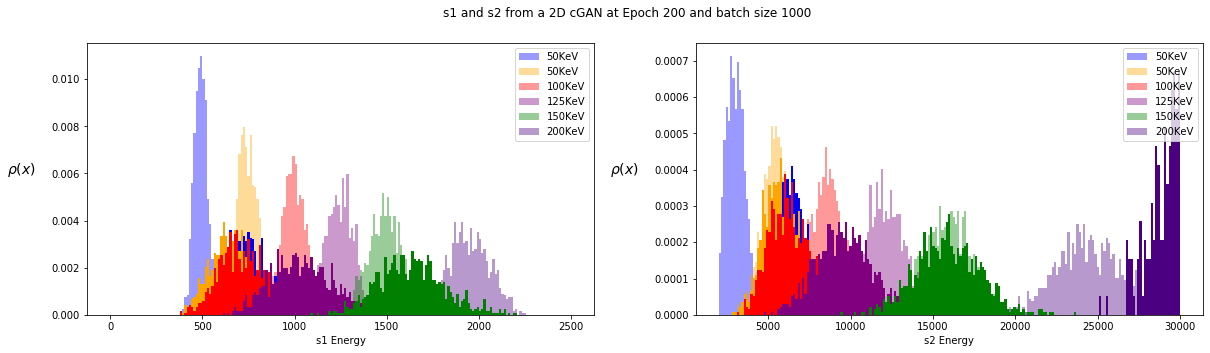

SAVING


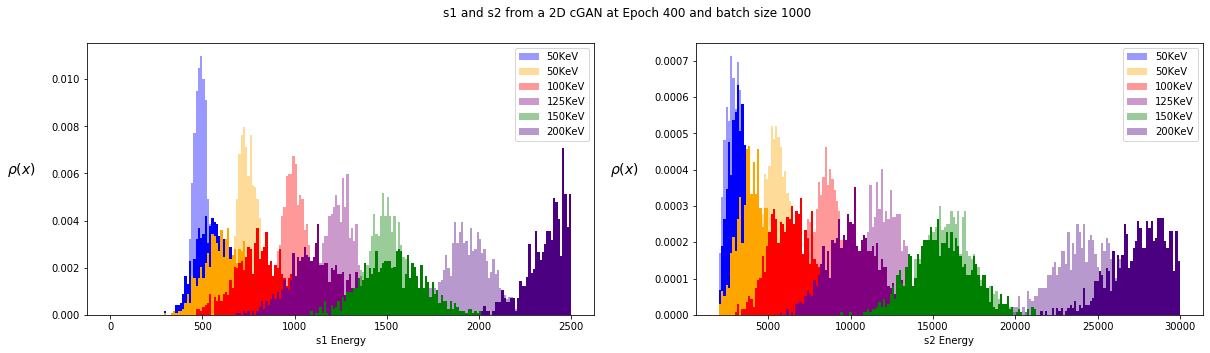

SAVING


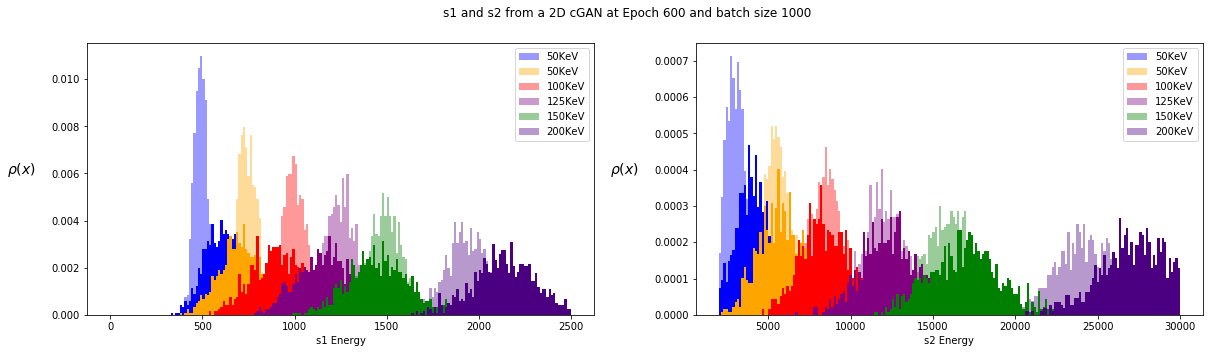

SAVING


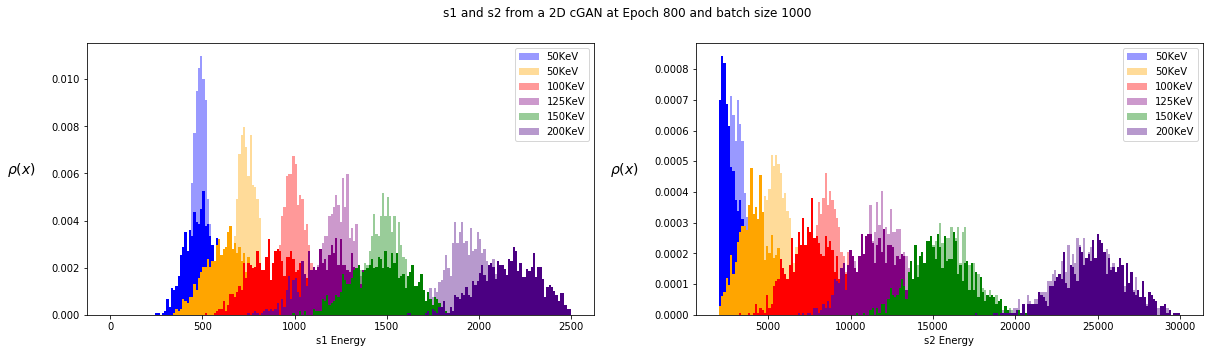

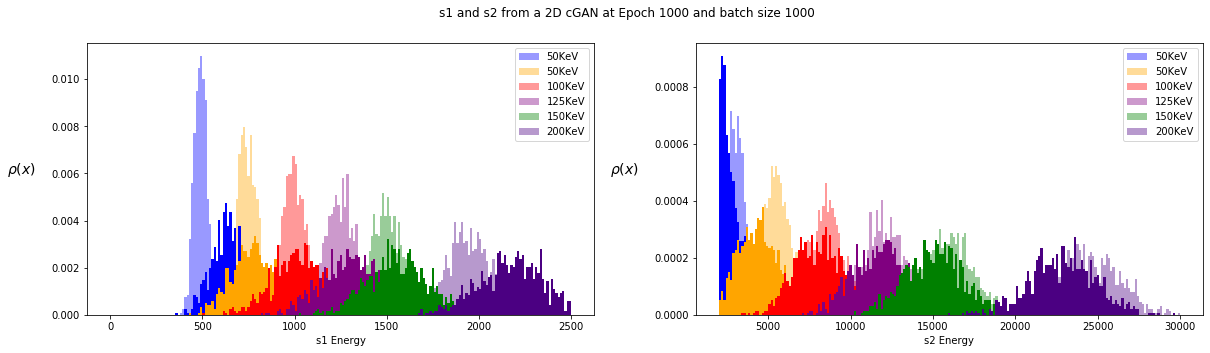

SAVING


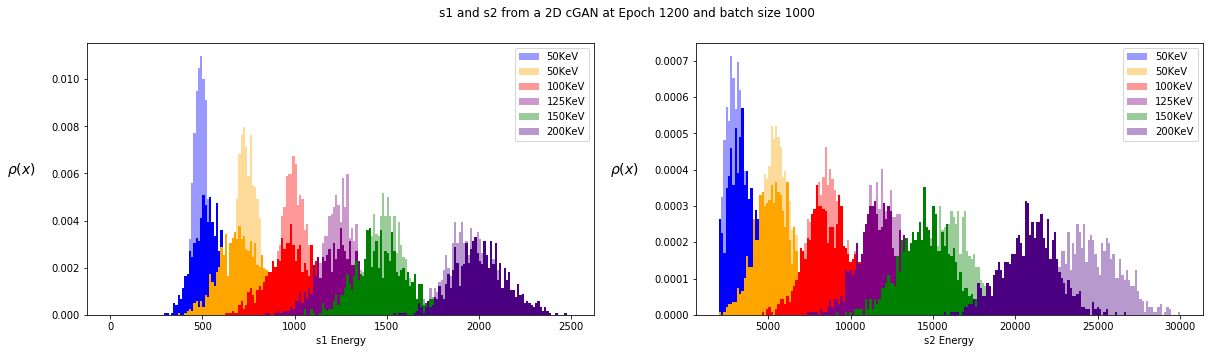

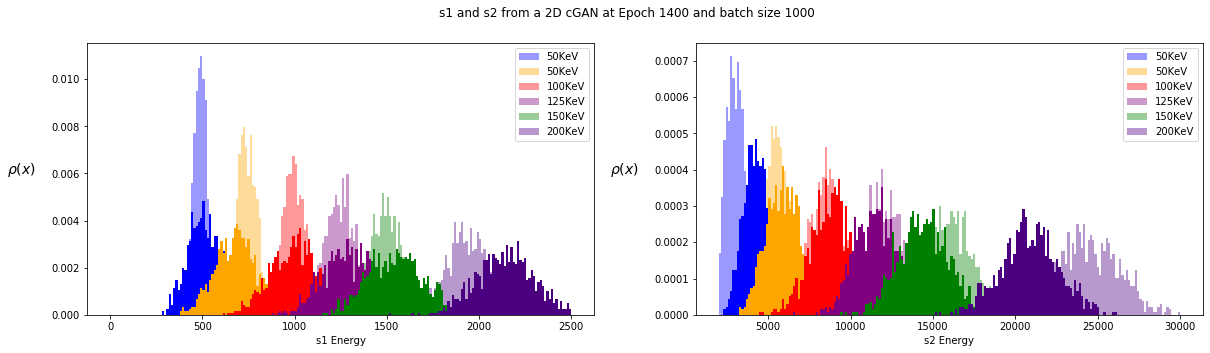

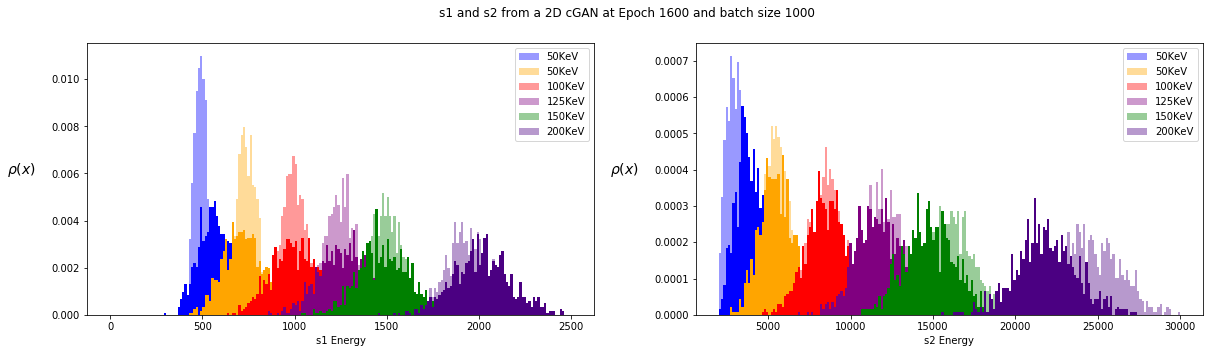

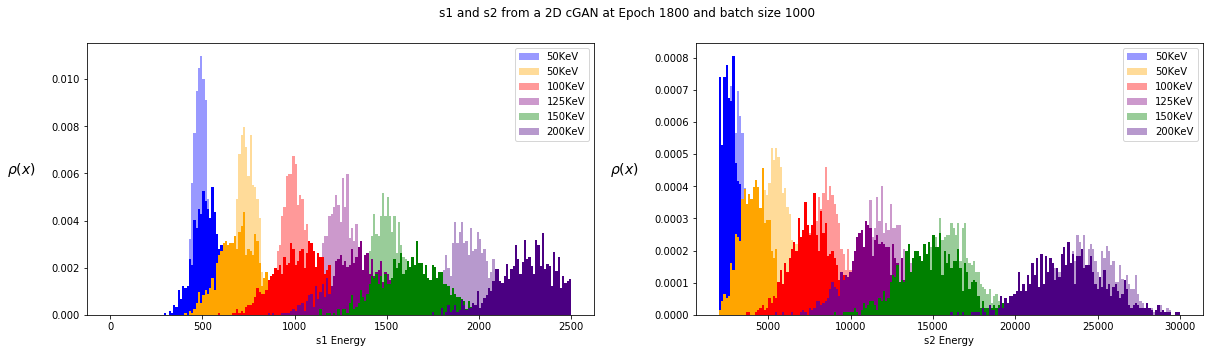

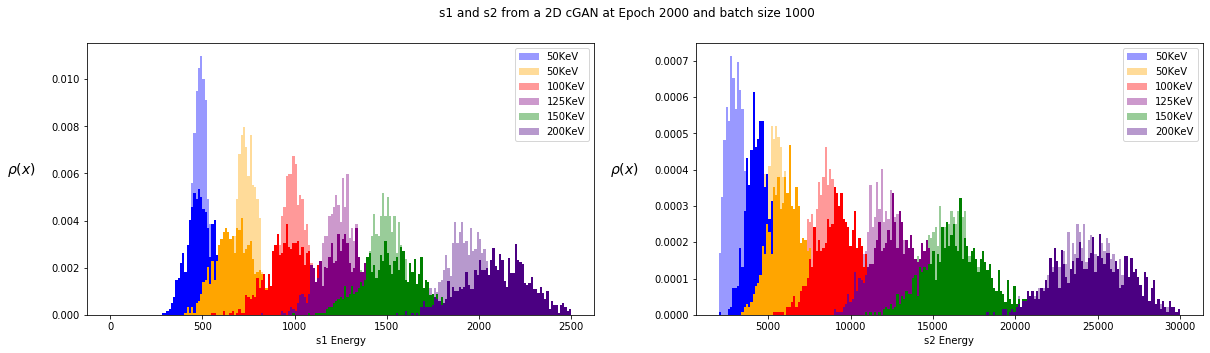

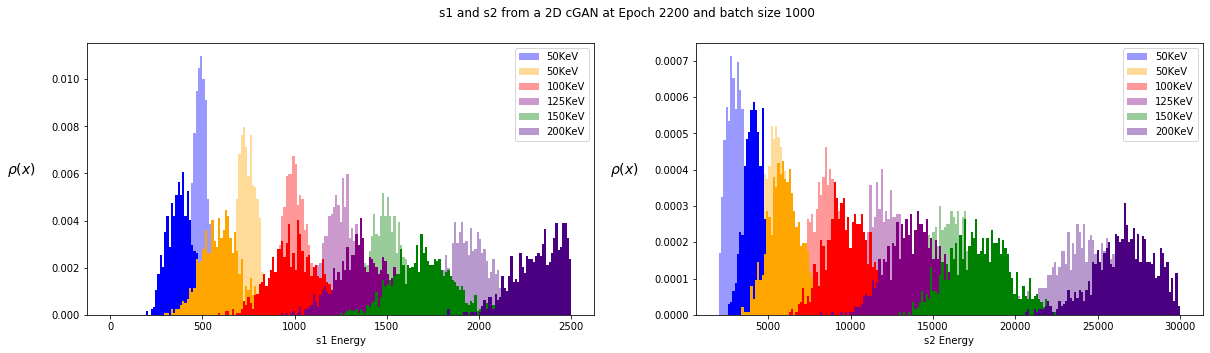

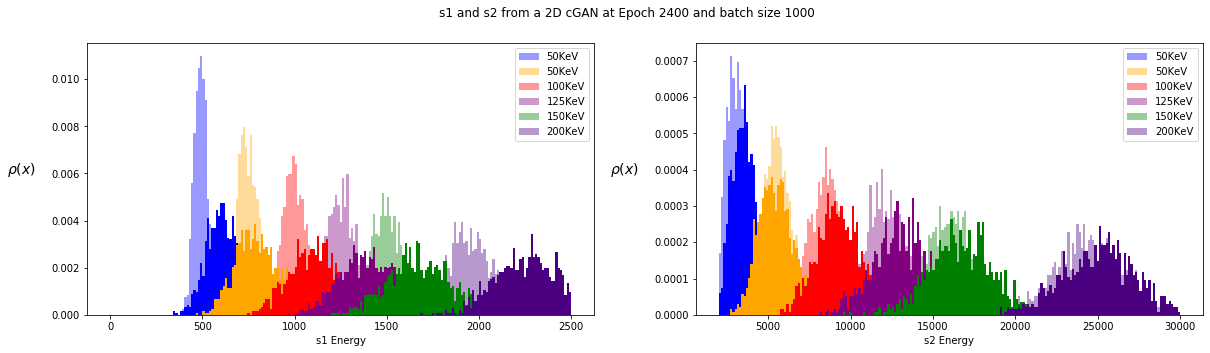

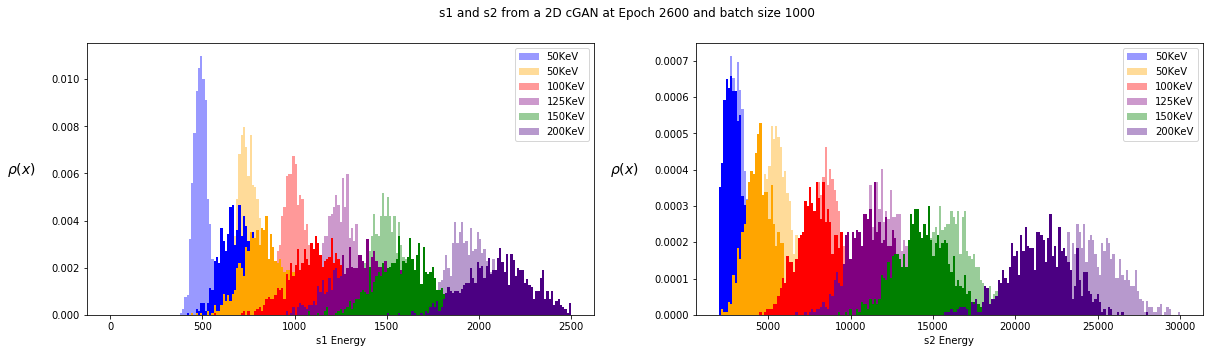

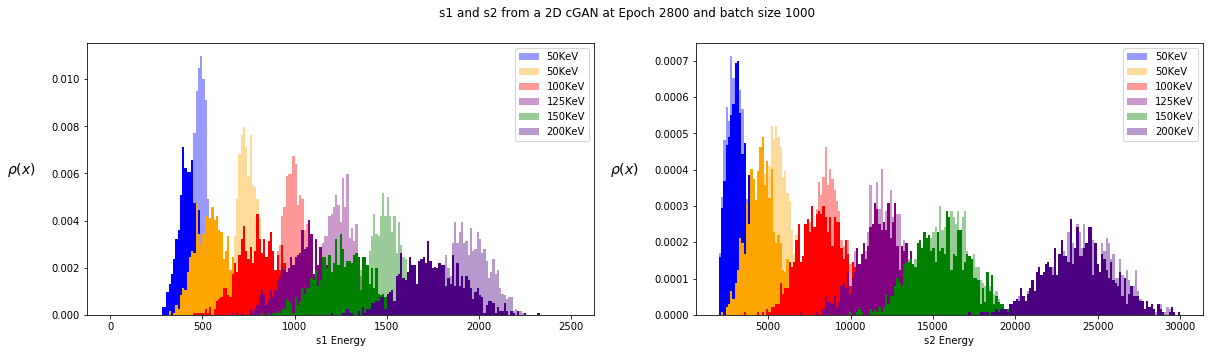

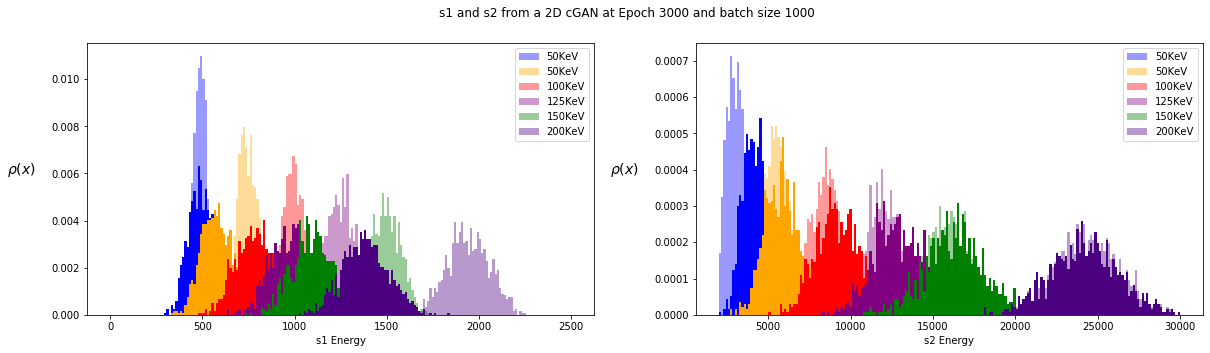

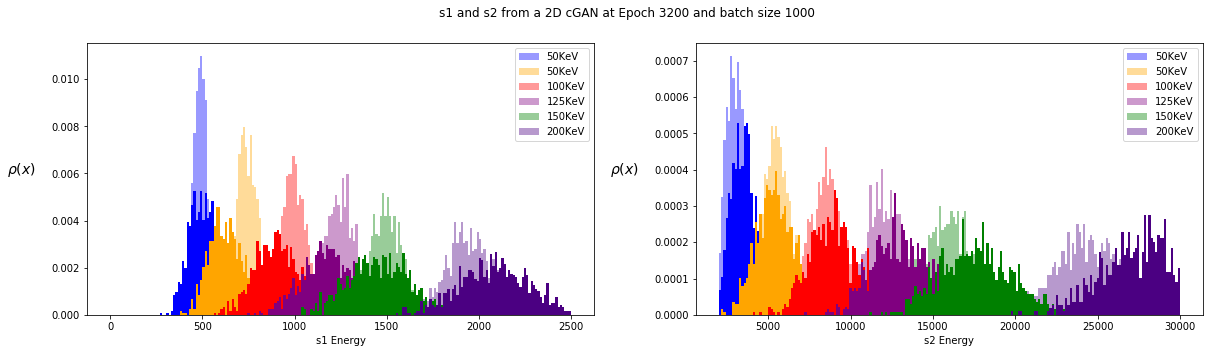

SAVING


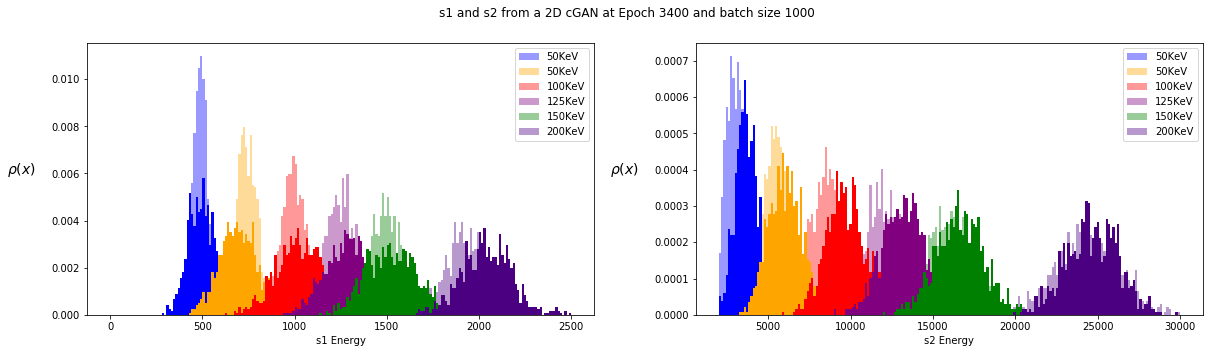

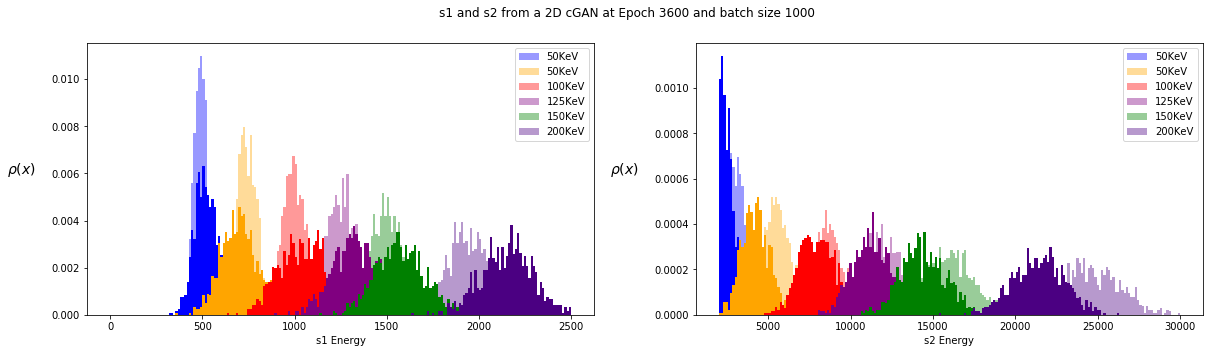

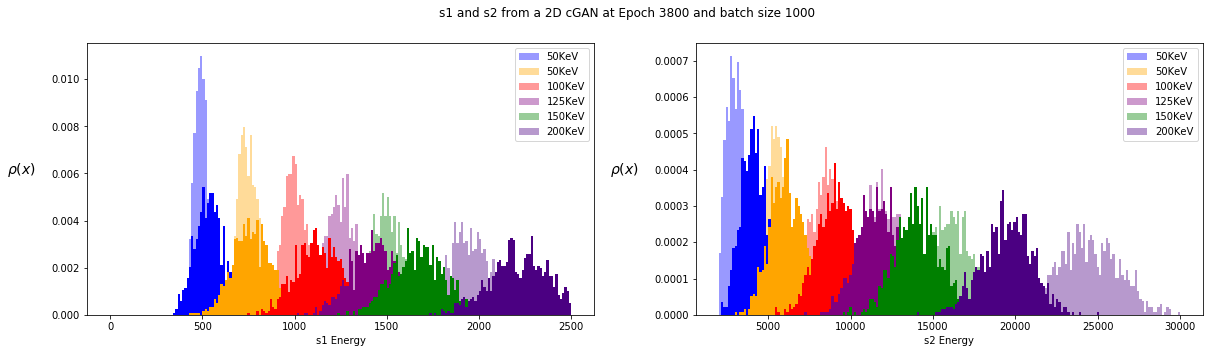

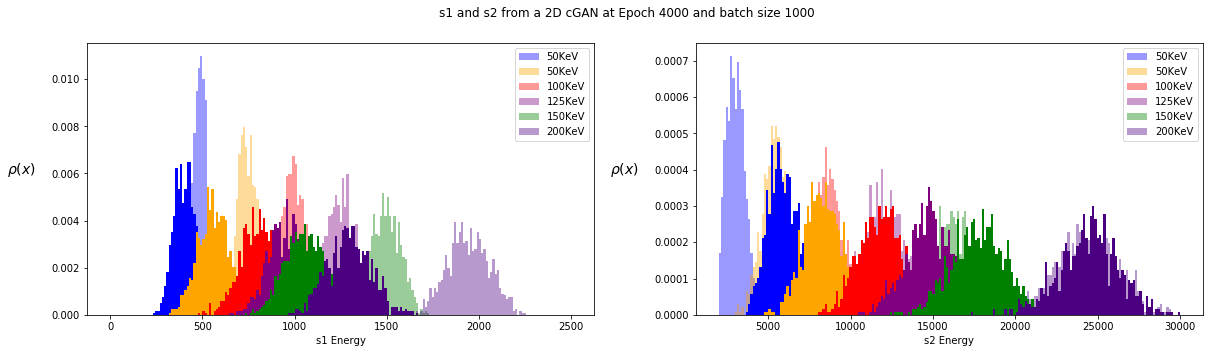

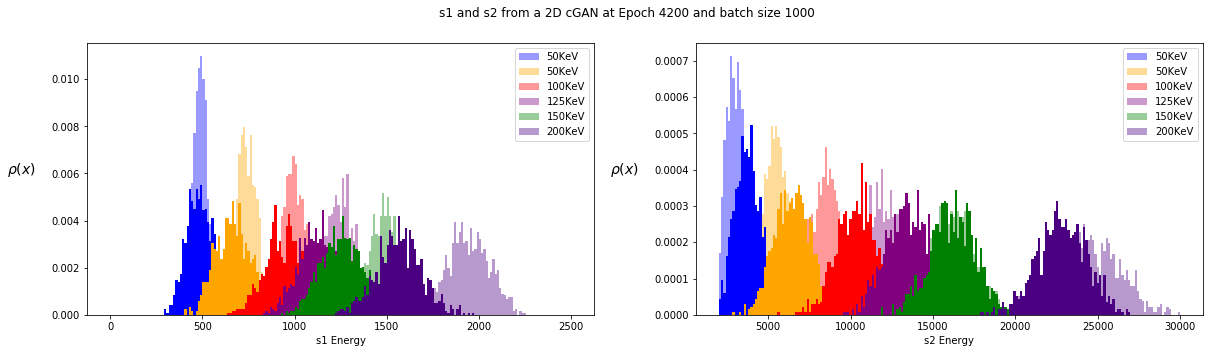

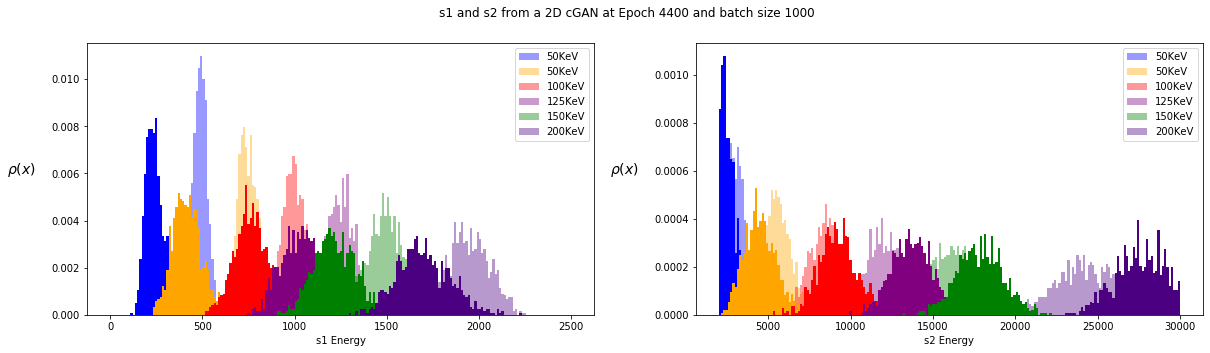

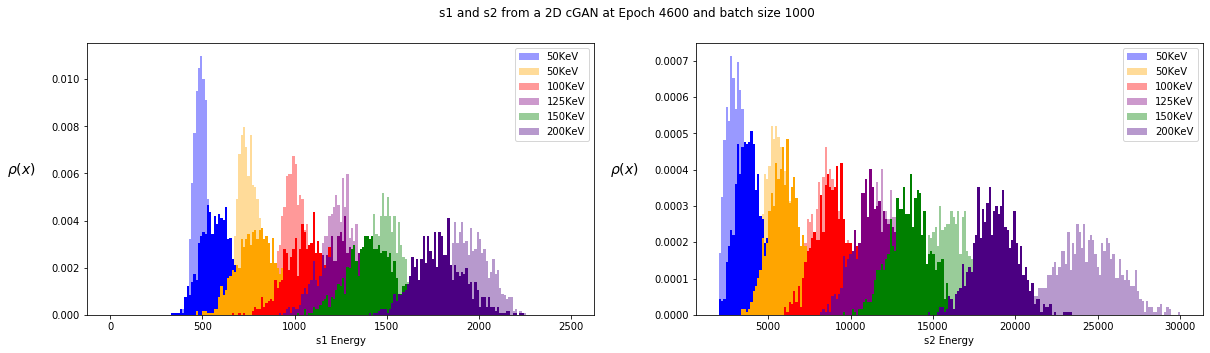

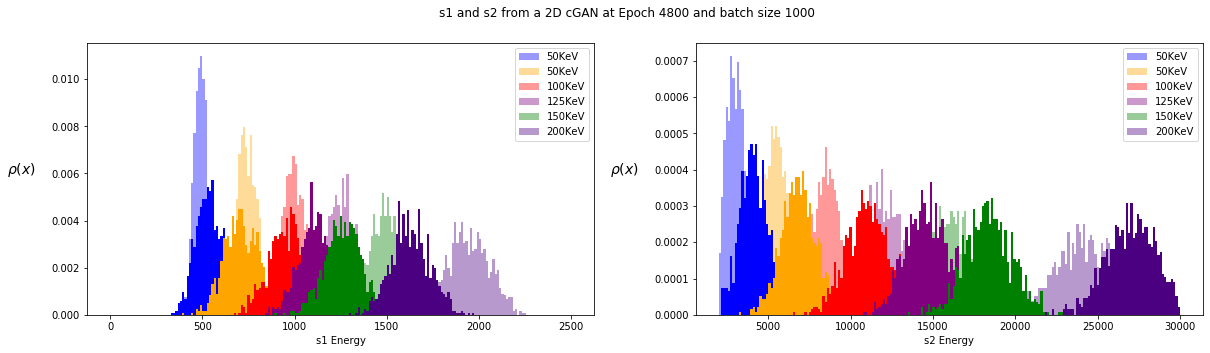

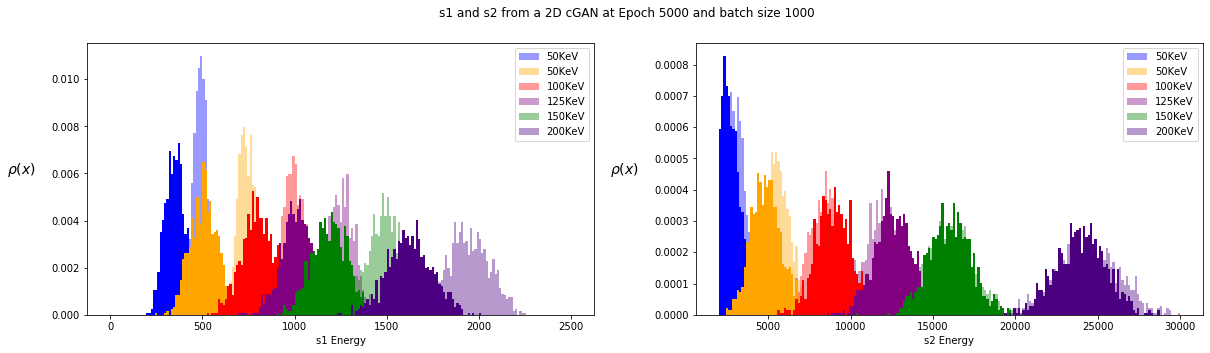

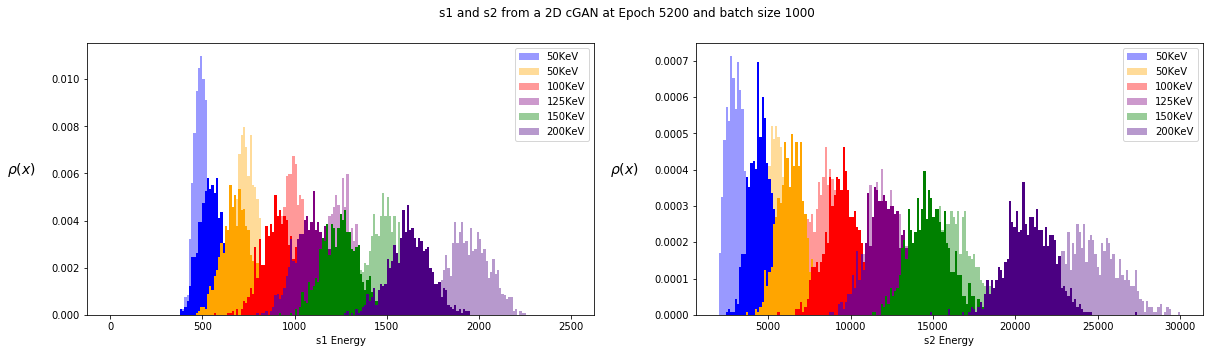

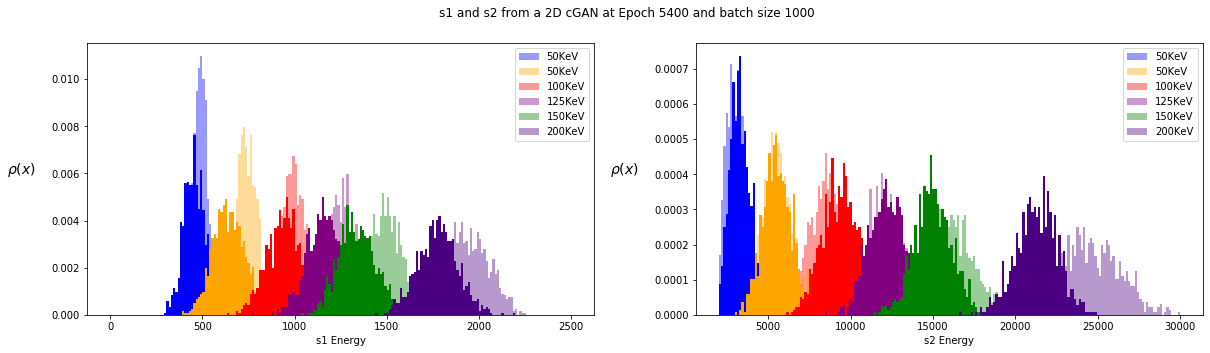

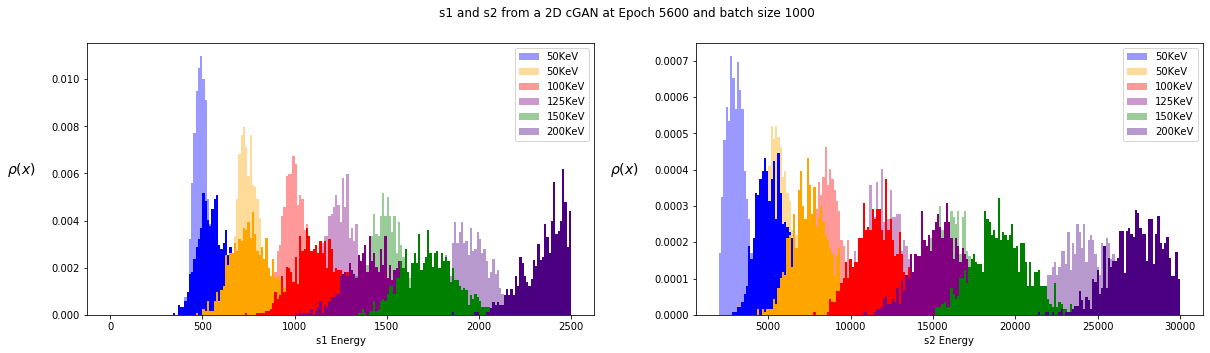

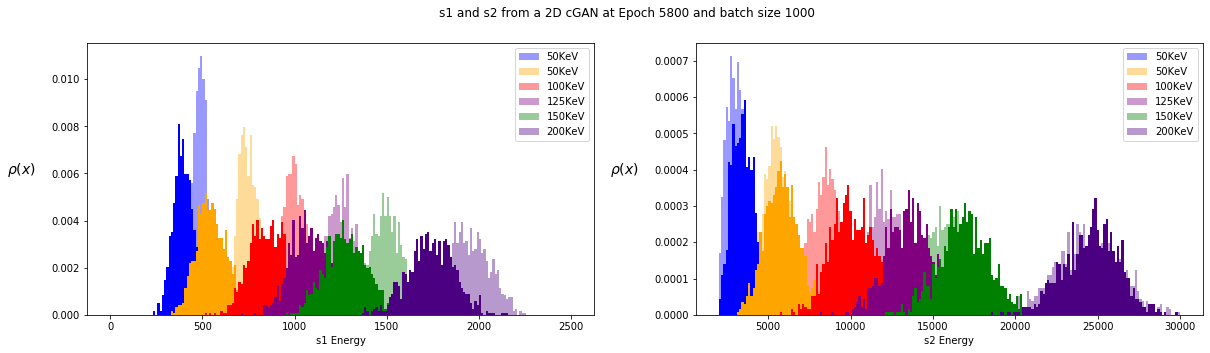

SAVING


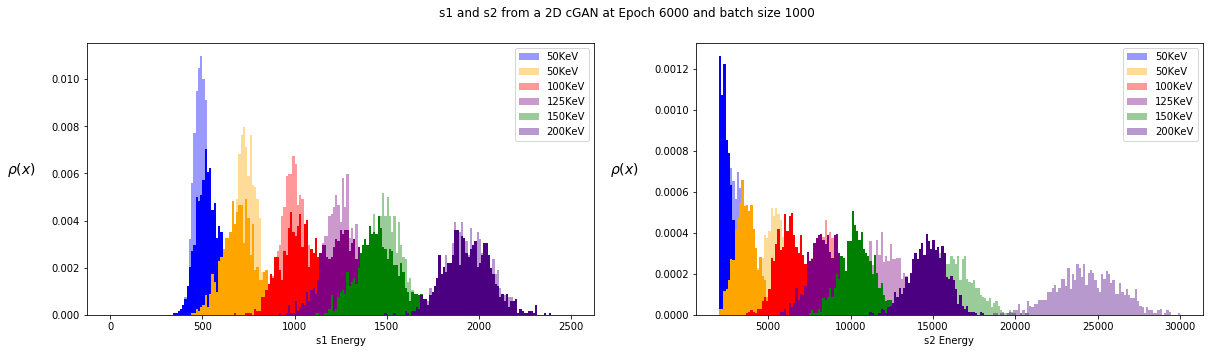

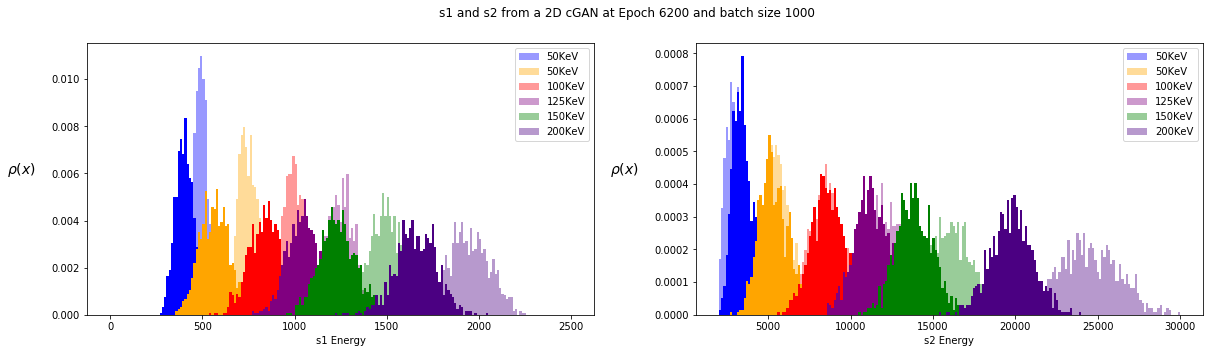

In [0]:
#  Train GAN
range_min, range_max = 0, 70
range_width = 70
plot_resolution = 200
epochs     = 15000
batch_size = 1000
minloss = 1000000
rel_batch_size = 1
real_loss = []
real_acc = []
epoch_no = []
def update_batch_size (gen_DS, e) :
    global batch_size
    #batch_size = min(max(batch_size, 100+int((e+1)/10.)), num_train)
    
def get_noise () :
    hyperparams = np.concatenate([np.full(fill_value=train_var[0], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[1], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[2], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[3], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[4], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[5], shape=(batch_size, 1))])
    noise = np.random.normal(size=(6*batch_size, noise_size))
    return noise, hyperparams

def get_train_data () :
    rannum1 = np.random.randint(0, len(train_DS_s1ene_50), rel_batch_size*batch_size)
    batch_s11 = train_DS_s1ene_50[rannum1].reshape(rel_batch_size*batch_size)
    batch_s21 = train_DS_s2ene_50[rannum1].reshape(rel_batch_size*batch_size)
    batch_1 = np.matrix([batch_s11,batch_s21]).T
    batch_1 = np.array(batch_1)

    batch_s12 = train_DS_s1ene_75[rannum1].reshape(rel_batch_size*batch_size)
    batch_s22 = train_DS_s2ene_75[rannum1].reshape(rel_batch_size*batch_size)
    batch_2 = np.array(np.matrix([batch_s12,batch_s22]).T)

    batch_s13 = train_DS_s1ene_100[rannum1].reshape(rel_batch_size*batch_size)
    batch_s23 = train_DS_s2ene_100[rannum1].reshape(rel_batch_size*batch_size)
    batch_3 = np.array(np.matrix([batch_s13,batch_s23]).T)
    
    batch_s14 = train_DS_s1ene_125[rannum1].reshape(rel_batch_size*batch_size)
    batch_s24 = train_DS_s2ene_125[rannum1].reshape(rel_batch_size*batch_size)
    batch_4 = np.array(np.matrix([batch_s14,batch_s24]).T)

    batch_s15 = train_DS_s1ene_150[rannum1].reshape(rel_batch_size*batch_size)
    batch_s25 = train_DS_s2ene_150[rannum1].reshape(rel_batch_size*batch_size)
    batch_5 = np.array(np.matrix([batch_s15,batch_s25]).T)

    batch_s16 = train_DS_s1ene_200[rannum1].reshape(rel_batch_size*batch_size)
    batch_s26 = train_DS_s2ene_200[rannum1].reshape(rel_batch_size*batch_size)
    batch_6 = np.array(np.matrix([batch_s16,batch_s26]).T)

    hyperparams = np.concatenate([np.full(fill_value=train_var[0], shape=(rel_batch_size*batch_size, 1)),
                                  np.full(fill_value=train_var[1], shape=(rel_batch_size*batch_size, 1)),
                                  np.full(fill_value=train_var[2], shape=(rel_batch_size*batch_size, 1)),
                                  np.full(fill_value=train_var[3], shape=(rel_batch_size*batch_size, 1)),
                                  np.full(fill_value=train_var[4], shape=(rel_batch_size*batch_size, 1)),
                                  np.full(fill_value=train_var[5], shape=(rel_batch_size*batch_size, 1))])
    return np.concatenate([batch_1, batch_2, batch_3, batch_4, batch_5, batch_6]), hyperparams
  
epochs_saved = []
for e in range(epochs) :
    noise, noise_hyperparams    = get_noise()
    batch_DS, batch_hyperparams = get_train_data()
    gen_DS   = gc.predict([noise, noise_hyperparams])
    real_label  = np.array([[1., 0.] for i in range(6*rel_batch_size*batch_size)])
    fake_label  = np.array([[0., 1.] for i in range(6*batch_size)])
    train_label = np.array([[1., 0.] for i in range(6*batch_size)])
    X  = np.concatenate([batch_DS  , gen_DS    ])
    Xh = np.concatenate([batch_hyperparams  , noise_hyperparams    ])
    Y = np.concatenate([real_label, fake_label])
    W = np.concatenate([np.ones(shape=(batch_DS.shape[0],)), np.full(fill_value=rel_batch_size, shape=(gen_DS.shape[0],))])
    
    dc.trainable = True
    d_loss, d_acc = dc.train_on_batch([X, Xh], Y, sample_weight=W)

        
    noise, noise_hyperparams = get_noise()
    dc.trainable = False
    gan.train_on_batch([noise, noise_hyperparams], train_label)
    
    if e == 0 or (e+1) % 200 == 0 :
        minloss = plot_points_GAN(
            gen_DS,
            train_DS_s1ene_50,
            train_DS_s1ene_100,
            train_DS_s1ene_150,
            minloss,
            epoch=e+1, 
            batch_size=batch_size, 
            d_acc=dc.evaluate([X, Xh], Y, sample_weight=W, verbose=0)[1])
        update_batch_size(gen_DS, e)
        epoch_no.append(e)
        real_loss.append(d_loss)
        real_acc.append(d_acc)
        epochs_saved.append(e+1)

In [0]:
#Print the predicted for a range
final_gc = load_model("2D_s1_s2_5IN.h5", compile = False)
masses = [50.,100.,150.,200.,]
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.hist(train_DS_s1ene_50*div1, density = True, bins = 205, alpha = 0.4, label = "50KeV - G4")
ax1.hist(train_DS_s1ene_75*div1, density = True, bins = 205, alpha = 0.4, label = "75KeV - G4")
ax1.hist(train_DS_s1ene_100*div1, density = True, bins = 205, alpha = 0.4, label = "100KeV - G4")
ax1.hist(train_DS_s1ene_125*div1, density = True, bins = 205, alpha = 0.4, label = "125KeV - G4")
ax1.hist(train_DS_s1ene_150*div1, density = True, bins = 205, alpha = 0.4, label = "150KeV - G4")
ax1.hist(train_DS_s1ene_200*div1, density = True, bins = 205, alpha = 0.4, label = "200KeV - G4")

ax2.hist(train_DS_s2ene_50*div2,density = True, bins = 205, alpha = 0.4, label = "50KeV - G4")
ax2.hist(train_DS_s2ene_75*div2, density = True, bins = 205, alpha = 0.4, label = "75KeV - G4")
ax2.hist(train_DS_s2ene_100*div2, density = True, bins = 205, alpha = 0.4, label = "100KeV - G4")
ax2.hist(train_DS_s1ene_125*div2, density = True, bins = 205, alpha = 0.4, label = "125KeV - G4")
ax2.hist(train_DS_s2ene_150*div2, density = True, bins = 205, alpha = 0.4, label = "150KeV - G4")
ax2.hist(train_DS_s2ene_200*div2, density = True, bins = 205, alpha = 0.4, label = "200KeV - G4")

for i in range(len(train_var)):
  hyperparams = np.full(fill_value=train_var[i], shape=(100000, 1))
  z = np.random.normal(size=(10000, noise_size))
  datapoints1 = final_gc.predict([z, hyperparams])[:,0]
  datapoints2 = final_gc.predict([z, hyperparams])[:,1]
  ax1.hist(datapoints1*div1, density = True, bins = 205, label = f'{train_var[i]}KeV - GAN')
  ax2.hist(datapoints2*div2, density = True, bins = 205, label = f'{train_var[i]}KeV - GAN')
  ax1.legend(loc="upper right", fontsize=10)
  ax2.legend(loc="upper right", fontsize=10)
  ax2.set_xlabel("s2 Energy")
  ax2.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
  ax1.set_xlabel("s1 Energy")
  ax1.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")

plt.show()
  

In [0]:
s1gen = []
logs2s1gen = []
for i in range(len(train_var)):
  hyperparams = np.full(fill_value=train_var[i], shape=(100000, 1))
  z = np.random.normal(size=(10000, noise_size))
  datapoints1 = final_gc.predict([z, hyperparams])[:,0]
  datapoints2 = final_gc.predict([z, hyperparams])[:,1]
  s1gen.append(np.mean(datapoints1)*div1)
  logs2s1gen.append(np.log(np.mean(datapoints2*div2)/np.mean(datapoints1*div1)))
print(s1gen)
print(logs2s1gen)
plt.legend(loc="upper right", fontsize=10)
#plt.set_xlabel("s1 Energy")
#plt.set_ylabel(r"ln(s2/s1)", size=14, labelpad=30, rotation="horizontal")
s1 = [np.mean(train_DS_s1ene_50*div1),np.mean(train_DS_s1ene_75*div1),np.mean(train_DS_s1ene_100*div1),np.mean(train_DS_s1ene_125*div1),np.mean(train_DS_s1ene_150*div1),np.mean(train_DS_s1ene_200*div1)]
logs2s1 = [np.log(np.mean(train_DS_s2ene_50*div2)/np.mean(train_DS_s1ene_50*div1)),np.log(np.mean(train_DS_s2ene_75*div2)/np.mean(train_DS_s1ene_75*div1)),np.log(np.mean(train_DS_s2ene_100*div2)/np.mean(train_DS_s1ene_100*div1)),np.log(np.mean(train_DS_s2ene_125*div2)/np.mean(train_DS_s1ene_125*div1)),np.log(np.mean(train_DS_s2ene_150*div2)/np.mean(train_DS_s1ene_150*div1)),np.log(np.mean(train_DS_s2ene_200*div2)/np.mean(train_DS_s1ene_200*div1))]
           
plt.scatter(s1,logs2s1)
plt.scatter(s1gen, logs2s1gen, marker = 'x')
plt.show()

In [0]:
del epoch_no[0]
del real_loss[0]
del real_acc[0]
h3 = plt.plot(epoch_no,real_loss, color = 'blue', label = "Loss")
h4 = plt.plot(epoch_no,real_acc, color = 'orange', label = "Accuracy")
plt.xlabel("Epoch number", size=14, labelpad=10)
plt.ylabel("Loss", size=14, labelpad=30, rotation="vertical")
plt.title(f"Disciminator variables with batch size {batch_size} for s1 vs s2")
plt.legend(loc="upper right", fontsize=10)
plt.show()

In [0]:
'''        
        #Graph the two distributions and pick the best one
        hyperparams = np.full(fill_value=200, shape=(100000, 1))
        z = np.random.normal(size=(1000, noise_size))
        datapoints1 = gc.predict([z, hyperparams])[:,0]
        datapoints2 = gc.predict([z, hyperparams])[:,1]
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_figheight(5)
        fig.set_figwidth(20)

        trues1 = ax1.hist(train_DS_s1ene_200*div1,range = (1500,2250), density = True, bins = 205, alpha = 1, color='red', label = 'G4 Data')
        gens1 = ax1.hist(datapoints1*div1,range = (1500,2250), density = True, bins = 205, alpha = 0.4, color='red', label = 'Generated Data')
        trues2 = ax2.hist(train_DS_s2ene_200*div2,range = (17500,30000), density = True, bins = 205, alpha = 1, color='red', label = 'G4 Data')
        gens2 = ax2.hist(datapoints2*div2,range = (17500,30000), density = True, bins = 205, alpha = 0.4, color='red', label = 'Generated Data')
        #Check difference
        
        diffs1 = trues1[0] - gens1[0]
        diffs2 = trues2[0] - gens2[0]
        sum_diff = 0
        for i in range(len(diffs1)):
          sum_diff += abs(diffs1[i]) + abs(diffs2[i])
        #If statement
        if sum_diff < minloss:
          #save weights
          gc.save("2D_s1_s2.h5")
          minloss = sum_diff'''